CSE 5243
# Lab 3: Comparing Classifiers
Mar. 7th, 2018

## 1. Preliminary data analysis

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
df=pd.read_csv("lab3/wine.data", sep=',',engine='python')
# df without Class
wocl = df.drop('Class', axis=1)
# df converted into Z score
zdf=pd.DataFrame(stats.zscore(wocl),columns=wocl.columns)
# final dataset
fnl = zdf.drop('Total phenols', axis=1)
# class dataset
cla= df['Class'] 

### Dataset Description
All entries are devided into 3 classes. Each entry has 13 attributes which are all numeric continuous attribute. Some of the attributes are highly correlated as we can see in the scatter plot.

There are no duplicated entries or missing values in the wine dataset. Although, there are some entries with values greater or lesser than the mean by 3 times of the SD, we do not have enough reason to exclude them, since we do not know the natural distribution of the wine attributes.

In [3]:
df[(np.abs(stats.zscore(df)) > 3).any(axis=1)]

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
25,1,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830
59,2,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520
69,2,12.21,1.19,1.75,16.8,151,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718
73,2,12.99,1.67,2.60,30.0,139,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985
95,2,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937
110,2,11.46,3.74,1.82,19.5,107,3.18,2.58,0.24,3.58,2.90,0.75,2.81,562
115,2,11.03,1.51,2.20,21.5,85,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407
121,2,11.56,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465
123,2,13.05,5.80,2.13,21.5,86,2.62,2.65,0.30,2.01,2.60,0.73,3.10,380
158,3,14.34,1.68,2.70,25.0,98,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660


In [4]:
df[df.duplicated()]

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline


In [5]:
df.drop('Class', axis=1).corr()[np.abs(df.drop('Class', axis=1).corr())>0.5]

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
Alcohol,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.546364,NaN,NaN,0.64372
Malic acid,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.561296,NaN,NaN
Ash,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alcalinity of ash,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Magnesium,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total phenols,NaN,NaN,NaN,NaN,NaN,1.000000,0.864564,NaN,0.612413,NaN,NaN,0.699949,NaN
Flavanoids,NaN,NaN,NaN,NaN,NaN,0.864564,1.000000,-0.53790,0.652692,NaN,0.543479,0.787194,NaN
Nonflavanoid phenols,NaN,NaN,NaN,NaN,NaN,NaN,-0.537900,1.00000,NaN,NaN,NaN,-0.503270,NaN
Proanthocyanins,NaN,NaN,NaN,NaN,NaN,0.612413,0.652692,NaN,1.000000,NaN,NaN,0.519067,NaN
Color intensity,0.546364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-0.521813,NaN,NaN


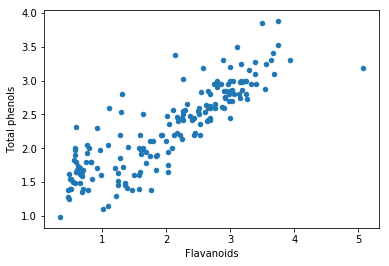

In [6]:
df.plot.scatter('Flavanoids','Total phenols')

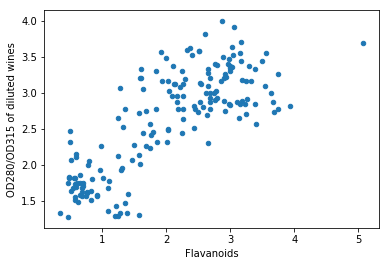

In [7]:
df.plot.scatter('Flavanoids','OD280/OD315 of diluted wines')

### Summary Statistics

There are altogether 178 entries. And basic statistics are as following.

In [8]:
wocl.mean()

Alcohol                          13.000618
Malic acid                        2.336348
Ash                               2.366517
Alcalinity of ash                19.494944
Magnesium                        99.741573
Total phenols                     2.295112
Flavanoids                        2.029270
Nonflavanoid phenols              0.361854
Proanthocyanins                   1.590899
Color intensity                   5.058090
Hue                               0.957449
OD280/OD315 of diluted wines      2.611685
Proline                         746.893258
dtype: float64

In [9]:
wocl.max()-wocl.min()

Alcohol                            3.80
Malic acid                         5.06
Ash                                1.87
Alcalinity of ash                 19.40
Magnesium                         92.00
Total phenols                      2.90
Flavanoids                         4.74
Nonflavanoid phenols               0.53
Proanthocyanins                    3.17
Color intensity                   11.72
Hue                                1.23
OD280/OD315 of diluted wines       2.73
Proline                         1402.00
dtype: float64

In [10]:
wocl.std()

Alcohol                           0.811827
Malic acid                        1.117146
Ash                               0.274344
Alcalinity of ash                 3.339564
Magnesium                        14.282484
Total phenols                     0.625851
Flavanoids                        0.998859
Nonflavanoid phenols              0.124453
Proanthocyanins                   0.572359
Color intensity                   2.318286
Hue                               0.228572
OD280/OD315 of diluted wines      0.709990
Proline                         314.907474
dtype: float64

## 2. Data Perprocessing
As suggested by the dataset discription, all values are converted into a z score for standardization. And attribute "Total phenols" is excluded for processing because it is highly correlated to "Flavanoids".

In [11]:
fnl.sample(3)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
165,0.90098,1.816558,-0.389355,0.902373,-0.824415,-1.565455,1.274310,-0.772492,0.675635,-0.778531,-1.217081,-0.722540
30,0.90098,-0.750759,1.218995,0.902373,0.088358,1.225573,-0.578985,1.382572,0.277671,1.020278,0.138864,1.713598
59,-0.77898,-1.253450,-3.679162,-2.671018,-0.824415,-1.465058,-0.659563,-2.051513,-1.344466,0.406051,-1.118210,-0.722540


## 3. Choose an Evaluation Approach
First, the dataset is devided into 2 datasets according to the odd and even index. The train and train_class is for part 4 and test and test_class is for part 5.

I choose the 3-fold cross-validation as the evaluation. The wine dataset is reletively some and this method can utilize every entry for training. And for a small dataset the drawback of computationally expensive is not so severe.

In [12]:
# data for part 4
train=fnl.iloc[fnl.index%2==0]
# true class for training data
train_class=cla.iloc[fnl.index%2==0]
test=fnl.iloc[fnl.index%2==1]
test_class=cla.iloc[fnl.index%2==1]

In [13]:
# ea is the Evaluation Method.
from sklearn.model_selection import KFold
ea = KFold(n_splits=3,shuffle=True,random_state=233)
# the split for train and test
a=[[],[],[]]
b=[[],[],[]]
a[0],a[1],a[2]=ea.split(train)
b[0],b[1],b[2]=ea.split(test)
#a[0][0] is the train for the first split of the training dataset (i.e. for part 4) 
#a[0][1] is the validation data for the first split 

## 4. Build and Evaluate six classifiers

In [14]:
# the function for calculation mean AUC and fpr/tpr for ROC plot
def mean_roc_auc(classifier,data,target,spl):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(3):
        # for every split
        x=data.iloc[spl[i][0]]
        y=target.iloc[spl[i][0]]
        classifier.fit(x,y)
        y_pre=classifier.predict(data.iloc[spl[i][1]])
        y_tru=target.iloc[spl[i][1]]
        for j in range(3):
            # consider every class label
            fpr[i*3+j],tpr[i*3+j],_=roc_curve(y_tru==j+1,y_pre==j+1)
            roc_auc[i*3+j] = auc(fpr[i*3+j], tpr[i*3+j])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3*3)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(9):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= 9

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    return {'fpr':all_fpr, 'tpr':mean_tpr ,'auc':roc_auc["macro"] }

In [15]:
#the function for draw ROC curve
def draw(t):
    plt.figure()
    plt.plot(t["fpr"], t["tpr"], color='darkorange', label='ROC curve (area = %0.2f)'%t["auc"])
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()


### 4.1. k-Nearsest Neighbors
#### Tunable Parameters
* n_neighbors: Number of neighbors to use. Use default 5.
* weights: Weight function for prediction. Use uniform here.
* algorithm: Algorithm for computation. Use auto
* p: Power parameter for the Minkowski metric. Use 2.
* metric: the methos for metric. Use Minkowski.
* metric_params: Additional keyword arguments for the metric function. Not needed here.
* n_jobs: Number of parallel jobs. Use -1 here to match the core number.



In [16]:
# import sklearn.model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from scipy import interp
neigh = KNeighborsClassifier(n_jobs=-1)

#### Performance Statistics

In [17]:
accuracy=cross_val_score(neigh,train,train_class,cv=ea,scoring='accuracy')
f1=cross_val_score(neigh,train,train_class,cv=ea,scoring='f1_macro')
roc=mean_roc_auc(neigh,train,train_class,a)
print(accuracy.mean())
print(f1.mean())
print(roc["auc"])

0.966283524904
0.96070160029
0.97304403686


#### Plot

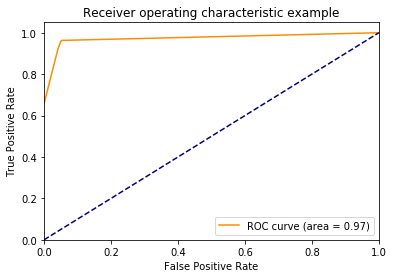

In [18]:
# draw(mean_roc_auc(neigh,train,train_class,a))
draw(roc)

### 4.2. Decision Tree
sklearn.tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)
#### Tunable Parameters
* criterion (string, default=”gini”): The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.
* splitter (string, default=”best”): The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.
* max_depth (int or None, default=None): The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
* min_samples_split (int, float, default=2): The minimum number of samples required to split an internal node. If int, then consider min_samples_split as the minimum number. If float, then min_samples_split is a percentage and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.
* min_samples_leaf (int, float, default=1): The minimum number of samples required to be at a leaf node. If int, then consider min_samples_leaf as the minimum number. If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.
* min_weight_fraction_leaf (float, default=0.): The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.
* max_features (int, float, string or None, default=None): The number of features to consider when looking for the best split. If int, then consider max_features features at each split. If float, then max_features is a percentage and int(max_features * n_features) features are considered at each split. If “auto”, then max_features=sqrt(n_features). If “sqrt”, then max_features=sqrt(n_features). If “log2”, then max_features=log2(n_features). If None, then max_features=n_features.
* random_state (int, RandomState instance or None, default=None): If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.
* max_leaf_nodes (int or None, default=None): Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
* min_impurity_decrease (float, default=0.): A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
* min_impurity_split (float): Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.
* class_weight (dict, list of dicts, “balanced” or None, default=None): Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one. For multi-output problems, a list of dicts can be provided in the same order as the columns of y.
* presort (bool, default=False): Whether to presort the data to speed up the finding of best splits in fitting. For the default settings of a decision tree on large datasets, setting this to true may slow down the training process. When using either a smaller dataset or a restricted depth, this may speed up the training.

We use default values for all above parameters.

In [19]:
# import sklearn.model_selection
from sklearn.tree import DecisionTreeClassifier
decisionTree = DecisionTreeClassifier()

#### Performance Statistics

In [20]:
accuracy=cross_val_score(decisionTree,train,train_class,cv=ea,scoring='accuracy')
f1=cross_val_score(decisionTree,train,train_class,cv=ea,scoring='f1_macro')
roc=mean_roc_auc(decisionTree,train,train_class,a)
print(accuracy.mean())
print(f1.mean())
print(roc["auc"])

0.886973180077
0.893734399482
0.918533489883


#### Plot

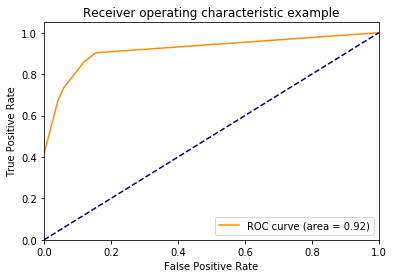

In [21]:
draw(roc)

### 4.3. Naive Bayes
class sklearn.naive_bayes.GaussianNB(priors=None)
#### Tunable Parameters
* priors (array-like, shape): Prior probabilities of the classes. If specified the priors are not adjusted according to the data.

We use default value for  parameters.

In [22]:
# import sklearn.model_selection
from sklearn.naive_bayes import GaussianNB
naiveBayes = GaussianNB()

#### Performance Statistics

In [23]:
accuracy=cross_val_score(naiveBayes,train,train_class,cv=ea,scoring='accuracy')
f1=cross_val_score(naiveBayes,train,train_class,cv=ea,scoring='f1_macro')
roc=mean_roc_auc(naiveBayes,train,train_class,a)
print(accuracy.mean())
print(f1.mean())
print(roc["auc"])

0.966283524904
0.967761524363
0.972209843533


#### Plot

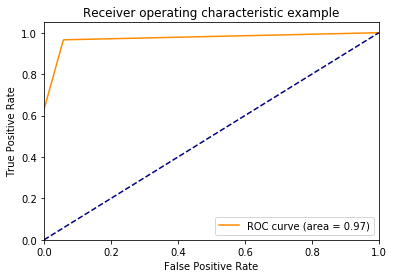

In [24]:
draw(roc)

### 4.4. Artificial Neural Network
class sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100, ), activation=’relu’, solver=’adam’, alpha=0.0001, batch_size=’auto’, learning_rate=’constant’, learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
#### Tunable Parameters
* hidden_layer_sizes (tuple, length = n_layers - 2, default (100,)): The ith element represents the number of neurons in the ith hidden layer.
* activation ({‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default 'relu'): Activation function for the hidden layer.
* solver ({‘lbfgs’, ‘sgd’, ‘adam’}, default ‘adam’): The solver for weight optimization.
* alpha (float, default 0.0001): L2 penalty (regularization term) parameter.
* batch_size (int, default ‘auto’): Size of minibatches for stochastic optimizers. If the solver is ‘lbfgs’, the classifier will not use minibatch. When set to “auto”, batch_size=min(200, n_samples)
* learning_rate ({‘constant’, ‘invscaling’, ‘adaptive’}, default ‘constant’): Learning rate schedule for weight updates.
* learning_rate_init (double, default 0.001): The initial learning rate used. It controls the step-size in updating the weights. Only used when solver=’sgd’ or ‘adam’.
* power_t (double, default 0.5): The exponent for inverse scaling learning rate. It is used in updating effective learning rate when the learning_rate is set to ‘invscaling’. Only used when solver=’sgd’.
* max_iter (int, default 200): Maximum number of iterations. The solver iterates until convergence (determined by ‘tol’) or this number of iterations. For stochastic solvers (‘sgd’, ‘adam’), note that this determines the number of epochs (how many times each data point will be used), not the number of gradient steps.
* shuffle (bool, default True): Whether to shuffle samples in each iteration. Only used when solver=’sgd’ or ‘adam’.
* random_state (int, RandomState instance or None, default None): If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.
* tol (float, default 1e-4): Tolerance for the optimization. When the loss or score is not improving by at least tol for two consecutive iterations, unless learning_rate is set to ‘adaptive’, convergence is considered to be reached and training stops.
* verbose (bool, default False): Whether to print progress messages to stdout.
* warm_start (bool, default False): When set to True, reuse the solution of the previous call to fit as initialization, otherwise, just erase the previous solution.
* momentum (float, default 0.9): Momentum for gradient descent update. Should be between 0 and 1. Only used when solver=’sgd’.
* nesterovs_momentum (boolean, default True): Whether to use Nesterov’s momentum. Only used when solver=’sgd’ and momentum > 0.
* early_stopping (bool, default False): Whether to use early stopping to terminate training when validation score is not improving. If set to true, it will automatically set aside 10% of training data as validation and terminate training when validation score is not improving by at least tol for two consecutive epochs. Only effective when solver=’sgd’ or ‘adam’.
* validation_fraction (float, default 0.1): The proportion of training data to set aside as validation set for early stopping. Must be between 0 and 1. Only used if early_stopping is True.
* beta_1 (float, default 0.9): Exponential decay rate for estimates of first moment vector in adam, should be in [0, 1). Only used when solver=’adam’
* beta_2 (float, default 0.999): Exponential decay rate for estimates of second moment vector in adam, should be in [0, 1). Only used when solver=’adam’
* epsilon (float, default 1e-8): Value for numerical stability in adam. Only used when solver=’adam’

We set the maximum number of iterations ('max_iter') to be 500 to make sure the optimization converges. For all other parameters, we use corresponding default values.

In [25]:
from sklearn.neural_network import MLPClassifier
neuralNetwork = MLPClassifier(max_iter=500)

#### Performance Statistics

In [26]:
accuracy=cross_val_score(neuralNetwork,train,train_class,cv=ea,scoring='accuracy')
f1=cross_val_score(neuralNetwork,train,train_class,cv=ea,scoring='f1_macro')
roc=mean_roc_auc(neuralNetwork,train,train_class,a)
print(accuracy.mean())
print(f1.mean())
print(roc["auc"])

0.965900383142
0.950501253133
0.967649534561


#### Plot

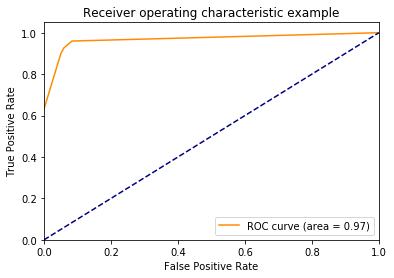

In [27]:
draw(roc)

### 4.5. Support Vector Machine
class sklearn.svm.LinearSVC(penalty=’l2’, loss=’squared_hinge’, dual=True, tol=0.0001, C=1.0, multi_class=’ovr’, fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000)
#### Tunable Parameters
* penalty (string, ‘l1’ or ‘l2, default=’l2’): Specifies the norm used in the penalization. The ‘l2’ penalty is the standard used in SVC. The ‘l1’ leads to coef_ vectors that are sparse.
* loss (string, ‘hinge’ or ‘squared_hinge’, default=’squared_hinge’): Specifies the loss function. ‘hinge’ is the standard SVM loss (used e.g. by the SVC class) while ‘squared_hinge’ is the square of the hinge loss.
* dual (bool, default=True): Select the algorithm to either solve the dual or primal optimization problem. Prefer dual=False when n_samples > n_features.
* tol (float, default=1e-4): Tolerance for stopping criteria.
* C (float, default=1.0): Penalty parameter C of the error term.
* multi_class (string, ‘ovr’ or ‘crammer_singer’, default=’ovr’): Determines the multi-class strategy if y contains more than two classes. "ovr" trains n_classes one-vs-rest classifiers, while "crammer_singer" optimizes a joint objective over all classes.
* fit_intercept (boolean, default=True): Whether to calculate the intercept for this model. If set to false, no intercept will be used in calculations (i.e. data is expected to be already centered).
* intercept_scaling (float, default=1): When self.fit_intercept is True, instance vector x becomes [x, self.intercept_scaling], i.e. a “synthetic” feature with constant value equals to intercept_scaling is appended to the instance vector. The intercept becomes intercept_scaling * synthetic feature weight Note! the synthetic feature weight is subject to l1/l2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) intercept_scaling has to be increased.
* class_weight ({dict, ‘balanced’}): Set the parameter C of class i to class_weight[i]*C for SVC. If not given, all classes are supposed to have weight one. The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))
* verbose (int, default=0): Enable verbose output. Note that this setting takes advantage of a per-process runtime setting in liblinear that, if enabled, may not work properly in a multithreaded context.
* random_state (int, RandomState instance or None, default=None): The seed of the pseudo random number generator to use when shuffling the data. If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.
* max_iter (int, default=1000): The maximum number of iterations to be run.

We use default values for all above parameters.

In [28]:
from sklearn.svm import LinearSVC
svm = LinearSVC()

In [29]:
accuracy=cross_val_score(svm,train,train_class,cv=ea,scoring='accuracy')
f1=cross_val_score(svm,train,train_class,cv=ea,scoring='f1_macro')
roc=mean_roc_auc(svm,train,train_class,a)
print(accuracy.mean())
print(f1.mean())
print(roc["auc"])

0.966283524904
0.961164021164
0.975056941969


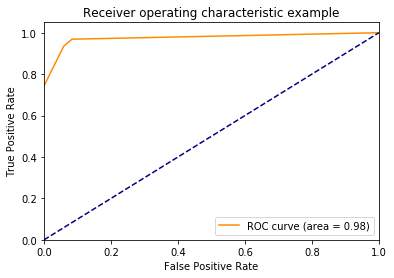

In [30]:
draw(roc)

### 4.6. Ensemble Classifier
class sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, class_weight=None)
#### Tunable Parameters
* n_estimators (integer, default=10): The number of trees in the forest.
* criterion (string, default=”gini”): The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. Note: this parameter is tree-specific.
* max_features (int, float, string or None, default=”auto”): The number of features to consider when looking for the best split. If int, then consider max_features features at each split. If float, then max_features is a percentage and int(max_features * n_features) features are considered at each split. If “auto”, then max_features=sqrt(n_features). If “sqrt”, then max_features=sqrt(n_features) (same as “auto”). If “log2”, then max_features=log2(n_features). If None, then max_features=n_features.
* max_depth  (integer or None, default=None): The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
* min_samples_split (int, float, default=2): The minimum number of samples required to split an internal node. If int, then consider min_samples_split as the minimum number. If float, then min_samples_split is a percentage and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.
* min_samples_leaf (int, float, default=1): The minimum number of samples required to be at a leaf node. If int, then consider min_samples_leaf as the minimum number. If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.
* min_weight_fraction_leaf (float, default=0.): The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.
* max_leaf_nodes (int or None, default=None): Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes. 
* min_impurity_split (float): Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.
* min_impurity_decrease (float, default=0.): A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
* bootstrap (boolean, default=True): Whether bootstrap samples are used when building trees.
* oob_score (bool, default=False): Whether to use out-of-bag samples to estimate the generalization accuracy.
* n_jobs (integer, default=1): The number of jobs to run in parallel for both fit and predict. If -1, then the number of jobs is set to the number of cores.
* random_state (int, RandomState instance or None, default=None): If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.
* verbose (int, default=0): Controls the verbosity of the tree building process.
* warm_start (bool, default=False): When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest.
* class_weight (dict, list of dicts, “balanced”, “balanced_subsample” or None, default=None): Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one. For multi-output problems, a list of dicts can be provided in the same order as the columns of y.

We use default values for all above parameters.

In [31]:
from sklearn.ensemble import RandomForestClassifier
ensemble = RandomForestClassifier()

In [32]:
accuracy=cross_val_score(ensemble,train,train_class,cv=ea,scoring='accuracy')
f1=cross_val_score(ensemble,train,train_class,cv=ea,scoring='f1_macro')
roc=mean_roc_auc(ensemble,train,train_class,a)
print(accuracy.mean())
print(f1.mean())
print(roc["auc"])

0.988888888889
0.967028196142
0.980346768337


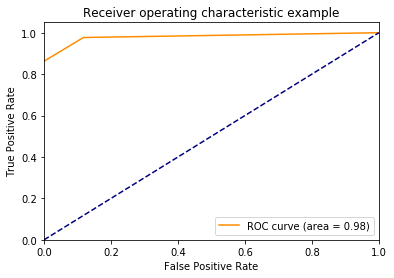

In [33]:
draw(roc)

From the validation statistics of above classifier models, we can see that the k-nearest neighbors, naive bayes, artificial neural network, support vector machine, and ensemle classifier all achieve high accuracies, F1 scores, and AUCs. The good performance of KNN classifier also indicates a feature of this dataset: data of the same category tend to cluster.

From the above classifiers, we prefer the Naive Bayes classifier because it is relatively simple but can still achieve excellent performance. 
## 5. Make Predictions and Evaluate Performance on the Test Set
### 5.1. k-Nearsest Neighbors
The k-Nearsest Neighbors Prediction works well on the test set.

In [34]:
accuracy=cross_val_score(neigh,test,test_class,cv=ea,scoring='accuracy')
f1=cross_val_score(neigh,test,test_class,cv=ea,scoring='f1_macro')
roc=mean_roc_auc(neigh,test,test_class,a)
print(accuracy.mean())
print(f1.mean())
print(roc["auc"])

0.943295019157
0.94353315656
0.964680178496


### 5.2. Decision Tree
The decision tree classifier does not generate well on the test set. One possible reason is that decision trees are more dependent on the training dataset. A small change in the training data can lead to a large change in the structure of the optimal decision tree.

In [35]:
accuracy=cross_val_score(decisionTree,test,test_class,cv=ea,scoring='accuracy')
f1=cross_val_score(decisionTree,test,test_class,cv=ea,scoring='f1_macro')
roc=mean_roc_auc(decisionTree,test,test_class,a)
print(accuracy.mean())
print(f1.mean())
print(roc["auc"])

0.854022988506
0.859141648017
0.865279750445


### 5.3. Naive Bayes
The Naive Bayes classifier generates well on the test set.

In [36]:
accuracy=cross_val_score(naiveBayes,test,test_class,cv=ea,scoring='accuracy')
f1=cross_val_score(naiveBayes,test,test_class,cv=ea,scoring='f1_macro')
roc=mean_roc_auc(naiveBayes,test,test_class,a)
print(accuracy.mean())
print(f1.mean())
print(roc["auc"])

0.932567049808
0.936110564627
0.957204223652


### 5.4. Artificial Neural Network
The artificial neural network classifier generates well on the test set.

In [37]:
accuracy=cross_val_score(neuralNetwork,test,test_class,cv=ea,scoring='accuracy')
f1=cross_val_score(neuralNetwork,test,test_class,cv=ea,scoring='f1_macro')
roc=mean_roc_auc(neuralNetwork,test,test_class,a)
print(accuracy.mean())
print(f1.mean())
print(roc["auc"])

0.954789272031
0.94353315656
0.972045498361


### 5.5. Support Vector Machine
The SVM classifier generates well on the test set.

In [38]:
accuracy=cross_val_score(svm,test,test_class,cv=ea,scoring='accuracy')
f1=cross_val_score(svm,test,test_class,cv=ea,scoring='f1_macro')
roc=mean_roc_auc(svm,test,test_class,a)
print(accuracy.mean())
print(f1.mean())
print(roc["auc"])

0.954406130268
0.958688024409
0.972045498361


### 5.6. Ensemble Classifier
The ensemble classifier generates well on the test set.

In [39]:
accuracy=cross_val_score(ensemble,test,test_class,cv=ea,scoring='accuracy')
f1=cross_val_score(ensemble,test,test_class,cv=ea,scoring='f1_macro')
roc=mean_roc_auc(ensemble,test,test_class,a)
print(accuracy.mean())
print(f1.mean())
print(roc["auc"])

0.94367816092
0.913154863828
0.915739832922


## 6. Exceptional work
### 6.1. Hyper-parameter optimizer
In this section, we optimize several parameters for the decision tree classifier using sklearn.model_selection.GridSearchCV. The optimized parameters are 'criterion', 'splitter', 'max_depth', 'max_features', and 'min_samples_split'. The optimization results are as follows.

In [40]:
from sklearn.model_selection import GridSearchCV
testDecisionTree = DecisionTreeClassifier()
parameters = {'criterion':('gini', 'entropy'), 'splitter':('best', 'random'), 
              'max_depth':list(range(1,20)),'max_features':list(range(1,12)),'min_samples_split':list(range(2,20))}
clf = GridSearchCV(testDecisionTree, parameters)
clf.fit(train,train_class)
clf.best_estimator_.get_params() 
bestDecisionTree = clf.best_estimator_
bestDecisionTree.get_params() 

{'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 16,
 'max_features': 2,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [41]:
accuracy=cross_val_score(bestDecisionTree,test,test_class,cv=ea,scoring='accuracy')
f1=cross_val_score(bestDecisionTree,test,test_class,cv=ea,scoring='f1_macro')
roc=mean_roc_auc(bestDecisionTree,test,test_class,a)
print(accuracy.mean())
print(f1.mean())
print(roc["auc"])

0.775862068966
0.807783284254
0.889186955879


The performance statistics of the decision tree classifier doesn't improve much with the optimized classifier. Also, when testing the parameter optimization process, we observed that the optimized results differ. Two possible reasons are: 1) the grid parameter searching algorithm converges to a local optimal point, or 2) the decision tree classifier is very sensitive to the changing data (the shuffled training dataset in cross validation).
### 6.2. K-nearest neighbors metrics
We choose four popular metrics for the k-nearest neighbors: Euclidean distance, Manhattan distance, Chebyshev distance, and Minkowski distance with p from 3 to 20. First we compare the first three metrics using GridSearchCV optimization. The Euclidean distance outperforms the other two metrics.

In [42]:
testNeigh = KNeighborsClassifier(n_jobs=-1)
parameters = {'metric':('euclidean', 'manhattan','chebyshev')}
clf = GridSearchCV(testNeigh, parameters)
clf.fit(train,train_class)
clf.best_estimator_.get_params() 
bestNeigh = clf.best_estimator_
bestNeigh.get_params() 

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'n_jobs': -1,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

Next, we compare the Euclidean distance with the Minkowski distances with p from 3 to 20. Since the Euclidean distance is a special case of Minkowski distance with p=2, we only set p to be the parameter to optimize. From the optimization results, p=2 gives the best system performance.

In [43]:
testNeigh2 = KNeighborsClassifier(n_jobs=-1)
parameters = {'p':list(range(2,20))}
clf = GridSearchCV(testNeigh, parameters)
clf.fit(train,train_class)
clf.best_estimator_.get_params() 
bestNeigh = clf.best_estimator_
bestNeigh.get_params() 

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': -1,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [44]:
accuracy=cross_val_score(bestNeigh,test,test_class,cv=ea,scoring='accuracy')
f1=cross_val_score(bestNeigh,test,test_class,cv=ea,scoring='f1_macro')
roc=mean_roc_auc(bestNeigh,test,test_class,a)
print(accuracy.mean())
print(f1.mean())
print(roc["auc"])

0.943295019157
0.94353315656
0.964680178496


The performance statistics are as above.